In [3]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import odeint 

$Ejercicio\, 1\, de\, la \,Guía\, 1$

$\begin{pmatrix}
\dot{x}\\ 
\dot{v}
\end{pmatrix}=\begin{pmatrix}
0 & 1\\ 
-\omega^{2} &0 
\end{pmatrix}
\begin{pmatrix}
x\\ 
v
\end{pmatrix}$


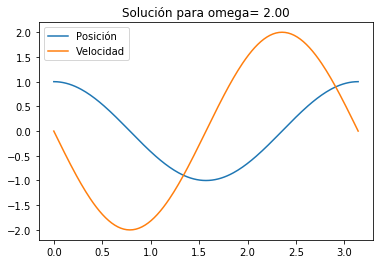

In [167]:

# vamos a definir una funcion maricial que realiza la siguente cuenta
#
# [0    1].[  y(t)  ]
# [-w^2 0] [dy(t)/dt]
#

def campo_vector(z, t, M): #z:vector [pos_ini,vel_ini],t:vector tiempos de integracion, M matriz de problema linealizado.
    A=np.matrix([[5,-2],[-17,-5]])
    x = z[0]
    y = z[1]
    dxdt = M[0,0]*x+M[0,1]*y
    dydt = M[1,0]*x+M[1,1]*y
    return [dxdt, dydt]  


z0=[1,0]                                 # posicion inicial in 1 y velocidad nula
omega0=2.0     # frecuencia angular del pendulo w^2=g/l
t=np.linspace(0,2*np.pi/omega0,201)             # puntos donde se evalua la funcion

M=np.matrix([[0,1],[-omega0**2,0]])

f=odeint(campo_vector,z0,t,args=(M,))     # integrador (de Euler) 
y,ydot=f[:,0],f[:,1]

plt.figure()                                    # inicio nuevo grafico
#plt.plot(y,ydot)                               # grafico de diagrama de fases
plt.plot(t,y,label='Posición') # grafico y vs. t 
plt.plot(t,ydot,label='Velocidad') # grafico ydot vs. t 

plt.title("Solución para omega= {:.2f}" .format(omega0))   # titulo 
plt.legend() #Muestra los labels
plt.show()                                      # mostrar en pantalla


In [126]:
from matplotlib import animation, rc # librería de animaciones
rc('animation', html='html5') #para poder ver la animacion en formato inline
import mpl_toolkits.mplot3d.axes3d as p3 #graficador en 3d
from IPython.display import HTML

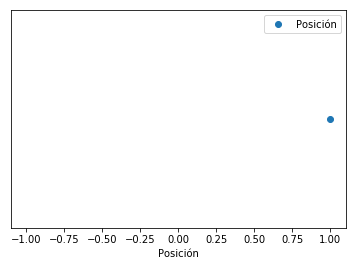

In [188]:
var=y #variable que quiero animar
label='Posición'
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim( min(var)-0.1*np.abs(min(var)), max(var)+0.1*np.abs(max(var)))
ax.set_ylim((-1, 1))
plt.xlabel('Posición')
plt.yticks([])
line, = ax.plot([], [],'o',label=label)
plt.legend()


# Función de inicialización, grafica el fondo para cada frame
def init():
    line.set_data([], [])
    return (line,)



# Función de animación. Se llama iterativamente
def animate(i):
    x = var[i]
    alt = 0
    line.set_data(x, alt)
    return (line,)




# Llama a la animación. blit=True para dibujar sólo lo que cambió (para ver trayectorias por ej).
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(y), interval=5*2*np.pi/omega0, blit=True)

# Para poder visualizar la animación en formato inline
rc('animation', html='html5')

anim

